### Topic Modeling

Reference: https://medium.com/airy-science/gain-insights-from-customers-review-using-topic-modelling-2ae632be202b

In [137]:
import pandas as pd
import warnings
import json
import datetime
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns
import lda
import numpy as np
import pyLDAvis

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import CountVectorizer 
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS

plt.style.use('ggplot')
warnings.filterwarnings(action="ignore")

### A. Import datasets

---

In [8]:
gcash_good_as = pd.read_csv('../../Data/Preprocessed/Mico/gcash_good_as.csv')
gcash_bad_as = pd.read_csv('../../Data/Preprocessed/Mico/gcash_bad_as.csv')
paymaya_good_as = pd.read_csv('../../Data/Preprocessed/Mico/paymaya_good_as.csv')
paymaya_bad_as = pd.read_csv('../../Data/Preprocessed/Mico/paymaya_bad_as.csv')

In [9]:
gcash_good_ps = pd.read_csv('../../Data/Preprocessed/Mico/gcash_good_ps.csv')
gcash_bad_ps = pd.read_csv('../../Data/Preprocessed/Mico/gcash_bad_ps.csv')
paymaya_good_ps = pd.read_csv('../../Data/Preprocessed/Mico/paymaya_good_ps.csv')
paymaya_bad_ps = pd.read_csv('../../Data/Preprocessed/Mico/paymaya_bad_ps.csv')

In [11]:
def rating_plot(df1, df2, gb):
    df = df1['rating'].value_counts().rename(f'GCash {gb} Reviews').to_frame()\
         .join(df2['rating'].value_counts().rename(f'PayMaya {gb} Reviews').to_frame())
    df.plot(kind='bar')
    plt.xlabel("Rating")
    plt.ylabel("Count")
    plt.title(f"{gb} Reviews (January 2020 - May 2021)")
    print(f"GCash {gb} Reviews:\n{df1['rating'].value_counts()}\n")
    print(f"PayMaya {gb} Reviews:\n{df2['rating'].value_counts()}\n")

GCash Good Reviews:
5    182
4    129
Name: rating, dtype: int64

PayMaya Good Reviews:
5    434
4     42
Name: rating, dtype: int64



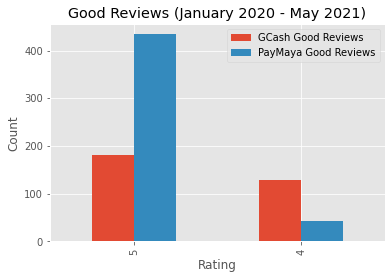

In [12]:
rating_plot(gcash_good_as, paymaya_good_as, 'Good')

GCash Bad Reviews:
1    1458
2     373
3     360
Name: rating, dtype: int64

PayMaya Bad Reviews:
1    580
2     97
3     67
Name: rating, dtype: int64



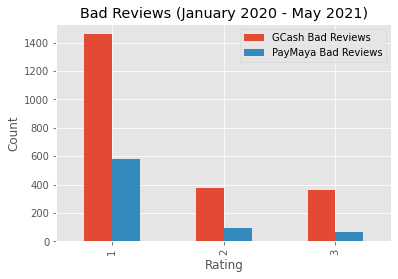

In [13]:
rating_plot(gcash_bad_as, paymaya_bad_as, 'Bad')

GCash Good Reviews:
5    76689
4    10631
Name: rating, dtype: int64

PayMaya Good Reviews:
5    40143
4     4455
Name: rating, dtype: int64



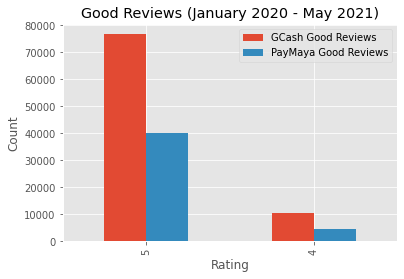

In [14]:
rating_plot(gcash_good_ps, paymaya_good_ps, 'Good')

GCash Bad Reviews:
1    28246
3     8578
2     6151
Name: rating, dtype: int64

PayMaya Bad Reviews:
1    10065
3     2377
2     1482
Name: rating, dtype: int64



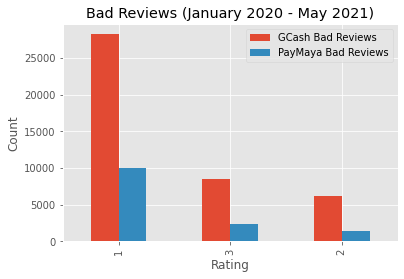

In [15]:
rating_plot(gcash_bad_ps, paymaya_bad_ps, 'Bad')

In [37]:
def rating_filter(corpus, rating):
    corpus = corpus.loc[corpus['rating'] == rating]
    return corpus

In [38]:
gcash_good_as = rating_filter(gcash_good_as, 5)
gcash_bad_as = rating_filter(gcash_bad_as, 1)
paymaya_good_as = rating_filter(paymaya_good_as, 5)
paymaya_bad_as = rating_filter(paymaya_bad_as, 1)

In [39]:
gcash_good_ps = rating_filter(gcash_good_ps, 5)
gcash_bad_ps = rating_filter(gcash_bad_ps, 1)
paymaya_good_ps = rating_filter(paymaya_good_ps, 5)
paymaya_bad_ps = rating_filter(paymaya_bad_ps, 1)

### B. Topic Modeling

---

First, we create the document term matrix per dataset.

In [96]:
def vectorize(df):
    vectorizer = CountVectorizer(min_df = 5, # Minimum required occurences of a word
                                max_features=10000, # Maximum number of unique words
                                ngram_range=(1,3)) # Sequence of N words
    
    return vectorizer, vectorizer.fit_transform(df['title_review_tokenized'])

In [129]:
gcash_good_vect, X_gcash_good = vectorize(gcash_good_as)
gcash_bad_vect,X_gcash_bad = vectorize(gcash_bad_as)
paymaya_good_vect,X_paymaya_good = vectorize(paymaya_good_as)
paymaya_bad_vect, X_paymaya_bad = vectorize(paymaya_bad_as)

In [130]:
def lda_model(n_topics, X):
    lda_model = lda.LDA(n_topics = n_topics, # Number of topics
                        n_iter = 2000) # Number of learning iterations
    
    X_topics = lda_model.fit_transform(X) # X is document term matrix
    
    return lda_model

In [131]:
gcash_good_lda = lda_model(4, X_gcash_good)
gcash_bad_lda = lda_model(4, X_gcash_bad)
paymaya_good_lda = lda_model(4, X_paymaya_good)
paymaya_bad_lda = lda_model(4, X_paymaya_bad)

INFO:lda:n_documents: 182
INFO:lda:vocab_size: 126
INFO:lda:n_words: 1731
INFO:lda:n_topics: 4
INFO:lda:n_iter: 2000
INFO:lda:<0> log likelihood: -13058
INFO:lda:<10> log likelihood: -9378
INFO:lda:<20> log likelihood: -9219
INFO:lda:<30> log likelihood: -9164
INFO:lda:<40> log likelihood: -8960
INFO:lda:<50> log likelihood: -9000
INFO:lda:<60> log likelihood: -8948
INFO:lda:<70> log likelihood: -8918
INFO:lda:<80> log likelihood: -8873
INFO:lda:<90> log likelihood: -8851
INFO:lda:<100> log likelihood: -8793
INFO:lda:<110> log likelihood: -8812
INFO:lda:<120> log likelihood: -8831
INFO:lda:<130> log likelihood: -8817
INFO:lda:<140> log likelihood: -8832
INFO:lda:<150> log likelihood: -8841
INFO:lda:<160> log likelihood: -8800
INFO:lda:<170> log likelihood: -8790
INFO:lda:<180> log likelihood: -8776
INFO:lda:<190> log likelihood: -8788
INFO:lda:<200> log likelihood: -8781
INFO:lda:<210> log likelihood: -8867
INFO:lda:<220> log likelihood: -8800
INFO:lda:<230> log likelihood: -8810
INFO:

In [132]:
def print_topics(name, n_top_words, lda_model, vectorizer):
    print(f"{name} Reviews Topics:\n")
    topic_summaries = []
    topic_word = lda_model.topic_word_  # get the topic words
    vocab = vectorizer.get_feature_names()
    for i, topic_dist in enumerate(topic_word):
        topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
        topic_summaries.append(' '.join(topic_words))
        print(f'Topic {i}: { ", ".join(topic_words)}')

In [133]:
print_topics("GCash Good",10, gcash_good_lda, gcash_good_vect)

GCash Good Reviews Topics:

Topic 0: bank, use, easy, transaction, make, love, convenient, transfer, lot, feature
Topic 1: money, number, send, great, help, save, card, verify, love, best
Topic 2: use, good, update, get, need, service, problem, transaction, much, time
Topic 3: pay, bill, like, pay bill, would, go, really, helpful, convenient, gcredit


In [134]:
print_topics("GCash Bad",10, gcash_bad_lda, gcash_bad_vect)

GCash Bad Reviews Topics:

Topic 0: money, service, cash, bank, customer, customer service, use, transfer, transaction, account
Topic 1: verify, id, fully, account, student, fully verify, verify account, pera, get, verification
Topic 2: load, time, send, try, account, email, still, code, receive, ticket
Topic 3: update, use, fix, always, account, work, pay, bill, try, time


In [135]:
print_topics("PayMaya Good",10, paymaya_good_lda, paymaya_good_vect)

PayMaya Good Reviews Topics:

Topic 0: use, service, good, transaction, sobrang, fast, time, first, customer, mo
Topic 1: best, transaction, like, feature, application, convenient, really, ewallet, useful, love
Topic 2: use, pay, easy, bill, convenient, payment, load, great, pay bill, go
Topic 3: money, account, bank, transfer, send, even, cash, still, good, use


In [136]:
print_topics("PayMaya Bad",5, paymaya_bad_lda, paymaya_bad_vect)

PayMaya Bad Reviews Topics:

Topic 0: upgrade, account, card, upgrade account, use
Topic 1: service, customer, account, customer service, email
Topic 2: error, always, fix, internet, keep
Topic 3: money, bank, transfer, add, add money


### Topic Visualization
To follow

--- 